# Домашнее задание #2

## Общая информация

**Дата выдачи:** 2022.11.11

**Дедлайн:** 2022.11.30 (ср), 23:55

# 1. **[3 балла]** Использование готовых моделей перевода и оценка качества

В этом задании вам необходимо перевести тексты с русского языка на английский при помощи готовой модели машинного перевода а также известного онлайн-переводчика. Требуется сравнить результаты работы обоих методов используя метрики [BLEU](https://huggingface.co/spaces/evaluate-metric/bleu) и [BLEURT](https://huggingface.co/spaces/evaluate-metric/bleurt). В качестве данных будем использовать датасет [ted_talks_iwslt](https://huggingface.co/datasets/ted_talks_iwslt).

Скачаем данные и посмотрим на них:

In [2]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/google-research/bleurt.git to /tmp/pip-req-build-g7mjc6l4
  Running command git clone -q https://github.com/google-research/bleurt.git /tmp/pip-req-build-g7mjc6l4
     |████████████████████████████████| 880 kB 7.7 MB/s 
     |████████████████████████████████| 72 kB 1.5 MB/s 
     |████████████████████████████████| 451 kB 64.5 MB/s 
     |████████████████████████████████| 118 kB 51.3 MB/s 
     |████████████████████████████████| 352 kB 57.9 MB/s 
     |████████████████████████████████| 1.3 MB 54.9 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 1.5 MB 68.3 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 5.8 MB 68.7 MB/s 
     |██████████████████

In [3]:
from datasets import load_dataset
import pandas as pd
from tqdm.auto import tqdm 
import time
import numpy as np

In [ ]:
raw_data = load_dataset("ted_talks_iwslt", language_pair=("ru", "en"), year="2016")
df = pd.DataFrame(raw_data['train']['translation'])
print(f"Dataset contains {len(df)} samples")
df.head(3)

Generating train split: 0 examples [00:00, ? examples/s]

Dataset ted_talks_iwslt downloaded and prepared to /root/.cache/huggingface/datasets/ted_talks_iwslt/ru_en_2016-acc8e12e7621746c/1.1.0/a42f763b98f8e9cc19358a2ac1007b0b600554e260ee48e6316df39703ef37a4. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset contains 4100 samples


,en,ru
0,If you've taken a career break and are now loo...,"Если вы взяли перерыв в карьере, но уже хотите..."
1,Carol Fishman Cohen: How to get back to work a...,Кэрол Фишман Коэн: Как вернуться к работе посл...
2,Tim Urban knows that procrastination doesn't m...,"Тим Урбан знает, что в прокрастинации нет ниче..."


In [ ]:
df.shape

(4100, 6)

### **[0.5 балла]** Датасет содержит 4100 пар переводов текстов с русского языка на английский. В этом задании вам необходимо перевести предложения с русского на английский при помощи одной из готовых моделей из библиотеки [EasyNMT](https://github.com/UKPLab/EasyNMT).

In [ ]:
from easynmt import EasyNMT

model = EasyNMT('opus-mt', device='cuda:0')
model.translate(df['ru'][0], target_lang='en', source_lang='ru')

11.9kB [00:00, 18.9MB/s]                   
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/803k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/307M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 512 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


'If you\'ve taken a career break, but you want to go back to work, will you consider a temporary internship? An expert on returning to work, Carol Fishman Cohen, believes you shouldn\'t neglect them. In this presentation, you will hear about her own experience of returning to work as a 40-year-old intern, her activities to advocate for the interests of the "second-timers" and how employers are reconsidering their approach to returning talent.'

In [ ]:
df['EasyNMT'] = 'translation'
for i, j in enumerate(tqdm(df['ru'])):
  df['EasyNMT'][i] = model.translate(j, target_lang='en', source_lang='ru')

  0%|          | 0/4100 [00:00<?, ?it/s]

### **[0.5 балла]** Переведите тот же самый набор предложений с помощью Google Translate. Для этого воспользуйтесь библиотекой [googletrans](https://pypi.org/project/googletrans/).

In [ ]:
from googletrans import Translator
translator = Translator(raise_exception=False)

In [ ]:
df['Google'] = 'translation'
for i, j in enumerate(tqdm(df['ru'])):
  time.sleep(1) # дабы избежать бана 
  df['Google'][i] = translator.translate(j, dest='en', src='ru').text

  0%|          | 0/4100 [00:00<?, ?it/s]

Чтобы в будущем не ждать переводов, сохраним результаты.

In [ ]:
df.to_csv('/content/translations.csv')

###  **[0.5 балла]** Сравните полученные результаты с ground truth переводом. Какие ошибки вы можете наблюдать, с чем они могут быть связаны? Какой перевод выглядит более качественным по вашему мнению?

In [ ]:
np.random.seed(10)
df = pd.read_csv('/content/translations.csv')

for i in df.sample(5).values:
  print('Ground truth:', i[2])
  print('EasyNMT:', i[4])
  print('Google:', i[5])
  print('\n--------------\n')

Ground truth: Every day, we use materials from the earth without thinking, for free. But what if we had to pay for their true value: would it make us more careful about what we use and what we waste? Think of Pavan Sukhdev as nature's banker -- assessing the value of the Earth's assets. Eye-opening charts will make you think differently about the cost of air, water, trees ...
EasyNMT: Every day, we use the Earth's resources without thought, for free. What if we paid their real price? Would we be more obsessed with what we're using and what we're wasting? Pavan Suhdev is a banker of nature who determines the price of the Earth's natural resources. Unbelievable facts will make you think in a new way about the cost of air, water, trees...
Google: Every day we use land resources without hesitation, for free.But what if we paid their real price?We would have to follow the fact that we will interpret and what we spend in vain?Pavana Sukhdeva can be called a banker of nature - he determines t

В целом, переводы получислись весьма приемлемыми (спойлер, ниже мы в этом убедимся).

**Основные ошибки:** 
* выбранные моделью синонимы не всегда согласуются с конкретным термином в референсном предложении, например, обе модели предлагают вместо emails - letters;
* метсами пропускаются важные по смыслу слова insurance bonds - модель оставляет только insurance;
* не расставляет знаки препринания: пропущено тире;

По субъективным ощущениям EasyNMT справляется получше. К примеру, в первом представленном объекте 3-е предложение сгенерировано вопросом, как это было в референсе, в то время как у Google на этом месте утверждение. Также последнее предложение в том же примере по смыслу переведено ближе.

### **[0.75 балла]** Сравните качество перевода используя метрики BLEU и BLEURT. Для этого воспользуйтесь библиотекой [evaluate](https://github.com/huggingface/evaluate). Опишите принцип подсчета этих метрик, чем они отличаются, какие имеются преимущества и недостатки у каждой из этих метрик?

**BLEU**

Сначала распишем, как считается данная метрика. Допустим необходимо оценить качество перевода одного предложения. Для этого разбиваем перевод на n-граммы порядков 1-4 (верхнее значение 4 это дефолт, можно больше/меньше) и считаем $precision_i$, где $i$-порядок n-граммы. Берем геометричское среднее и получаем $score=\sqrt[4]{\prod_{i=1}^4precision_i}$. Также будем штрафовать модель, если перевод получился короче, чем предложение на исходном языке: $bp=\min\left(1, \dfrac{len(mt)}{len(gs)}\right)$, где $mt$-machine translation, $gs$-gold standard. 

*Преимущства*

* Легко считать и интерпретировать;
* Можно использовать, когда работаем с несколькими референсными предложениями;
* Не зависит от языка, благодаря чему применима в NLP моделях.

*Недостатки*

* Не учитывает семантику предлагаемого перевода;
* Проверяет точное совпадение слов, хотя иногда; использование синонима может быть ни чуть не хуже;
* Не учитывает порядок слов, в некоторых ситуациях это может быть плохо.

**BLEURT**

BLEURT - это обученная метрика, которую представили в [этой статье](https://aclanthology.org/2020.acl-main.704.pdf), способная моделировать человеческие оценки качества перевода с очень высокой точностью. Как её обучали? Задача - создать функцию $f(x, \tilde{x})→y$, принимающую на вход рефернсное $x$ и сгенерированное $\tilde{x}$ предложение и предсказывающую оценку человека $y$. Для этого авторы предобучили BERT на огромном объеме синтетических данных, а затем, используя данные с WMT metric shared task, зафайнтюнили его на предсказание оценки человека: брали CLS токены BERT'а и фактически строили линейную регрессию $\hat{y}=f(x, \tilde{x})=W\tilde{v}_{[CLS]}+b$, где $W$ - матрица весов, $b$ - сдвиг.

*Преимущства*

* Имеет очень выскокую корреляцию с оценками человека;
* Позволяет сравнивать значение метрики для разных моделей и выборок (например, через распределение значение метрики).


*Недостатки*

* В сравнении с BLEU, требует больше вычислений.

In [ ]:
import evaluate
bleu = evaluate.load("bleu")
bleurt = evaluate.load("bleurt", 'bleurt-base-128')

Подсчитаем значение BLEURT для каждого объекта разных переводов.

In [ ]:
nmt_bleurt = bleurt.compute(predictions=df['EasyNMT'], references=df['en'])['scores']
google_bleurt = bleurt.compute(predictions=df['Google'], references=df['en'])['scores']

Для оценки переводов с помощью BLEURT обратимся (как к референсным) к медиане и квантилям распределения метрики, [представленным](https://github.com/google-research/bleurt/issues/1) одним из авторов статьи. Отмечу, что используется тот же самый BLEURT-base-128, что и в приведенной ссылке.

In [ ]:
bleurt_metric = pd.DataFrame({'model': ['Reference', 'EasyNMT', 'Google'],
                            'median': [0.13, np.median(nmt_bleurt), np.median(google_bleurt)],
                            'quantile_25%': [-0.26, np.quantile(nmt_bleurt, q=0.25), np.quantile(google_bleurt, q=0.25)],
                            'quantile_75%': [0.4, np.quantile(nmt_bleurt, q=0.75), np.quantile(google_bleurt, q=0.75)]})
bleurt_metric

,model,median,quantile_25%,quantile_75%
0,Reference,0.130000,-0.260000,0.400000
1,EasyNMT,0.084840,-0.159785,0.310724
2,Google,0.003429,-0.246772,0.235152


Как мы можем заметить по значениям рассчитанных показателей, распределения BLEURT для переводов EasyNMT (здесь и далее под  EasyNMT подразумевается выбранный opus-mt) и Google смещены влево относительно рефернсного (по данным WMT 2015-19). У EasyNMT величина смещения оказалась ниже, благодаря чему можно сказать, что данная модель показала себя лучше Google. Как [отметил](https://github.com/google-research/bleurt/issues/1) автор оригинальной статьи, BLEURT следует использовать для сравнения моледей, а не оценки такого, насколько плохо/хорошо сделаны переводы. Для ответа на последний вопрос обратимся к BLEU.

In [ ]:
bleu_metric = pd.DataFrame({'model': ['EasyNMT', 'Google'], 
              'BLEU': [bleu.compute(predictions=df['EasyNMT'], references=df['en'])['bleu'],
                       bleu.compute(predictions=df['Google'], references=df['en'])['bleu']],
              })
bleu_metric

,model,BLEU
0,EasyNMT,0.242658
1,Google,0.198020


Здесь EasyNMT снова показала себя лучше, чтобы было вполне ожидаемо. В [документации метрики](https://huggingface.co/spaces/evaluate-metric/bleu) в качестве референсных значений указаны ~0.24-0.28, поэтому можем сказать, что EasyNMT справился достаточно хорошо, Google похуже.

### **[0.75 балла]** Модели из EasyNMT поддерживают параметр beam_size. За что отвечает этот параметр? Попробуйте получить переводы текстов с различным значением параметра beam_size? Как меняется качество в зависимости от значения параметра? Опишите полученные результаты.



Здесь будем делать перевод для 500 предложений для разных размеров beam_size.

In [ ]:
bleus = []

for i in tqdm(range(1, 21)):
  rus = df['ru'][:500]
  eng = df['en'][:500]
  preds = rus.apply(lambda x: model.translate(x, target_lang='en', source_lang='ru', beam_size=i))
  bleus.append(bleu.compute(predictions=preds, references=eng)['bleu'])

  0%|          | 0/20 [00:00<?, ?it/s]

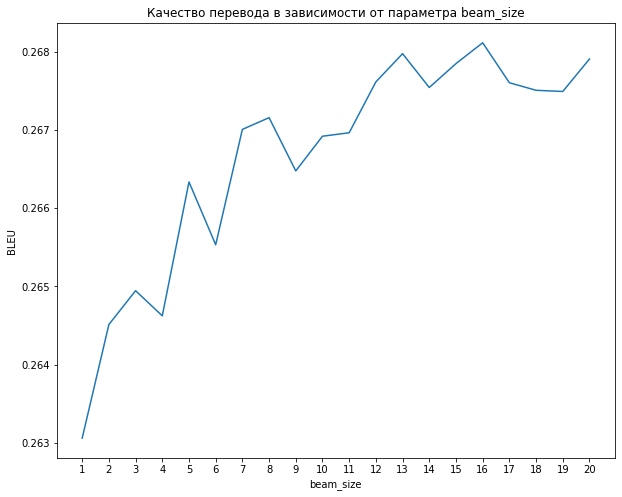

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(range(1, 21), bleus)
plt.title('Качество перевода в зависимости от параметра beam_size')
plt.xlabel('beam_size')
plt.xticks(list(range(1, 21)))
plt.ylabel('BLEU')
plt.show();

Beam search - алгоритм, который в машинном переводе используется для выбора наилучшего перевода. Beam_size - количество генерируемых кандидатов на каждом шаге, а также то число переводов которое держим в памяти. В конце кандидаты отбираются по используемой метрике, например BLEU.

Вполне логично, что при бОльших значениях beam_size будет подбираться наиболее качественный перевод, соответственно качество переводов должно расти. Здесь получился ломаный график, скорее всего из-за маленького размера выборки. Идеальный скорее всего будет выглядеть как график логарифма, сначала быстро растет, затем замедляется.

# 2. **[3 балла]** Оценка качества сгенерированных текстов

В рамках этого задания вам необходимо построить набор классификаторов, помогающий фильтровать выходы моделей машинного перевода тем самым улучшая качество. Задание состоит из нескольких этапов. 

### **[0.5 балла]** Выберите готовую модель машинного перевода из библиотеки EasyNMT, или любую другую, способную переводить тексты с английского языка на русский. Загрузите датасет [tatoeba](https://huggingface.co/datasets/tatoeba).

### С помощью готовой модели переведите тексты с английского на русский. Сделайте так, чтобы для одного примера на английском языке модель порождала несколько гипотез перевода на русский язык (например, можно взять различные значения параметра beam_size). Если инференс занимает много времени - возьмите первые 100 тысяч строчек датасета.

Будем работать с 20000 объектов.

In [ ]:
raw_data = load_dataset("tatoeba", lang1="en", lang2="ru")

df = pd.DataFrame(raw_data['train']['translation'])[:20000]
print(f"Total samples: {len(df)}")
print(f"English unique samples: {df.en.nunique()}")

df.head(3)

Generating train split: 0 examples [00:00, ? examples/s]

Dataset tatoeba downloaded and prepared to /root/.cache/huggingface/datasets/tatoeba/en-ru-lang1=en,lang2=ru/0.0.0/b3ea9c6bb2af47699c5fc0a155643f5a0da287c7095ea14824ee0a8afd74daf6. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Total samples: 20000
English unique samples: 14270


,en,ru
0,For once in my life I'm doing a good deed... A...,Один раз в жизни я делаю хорошее дело... И оно...
1,Let's try something.,Давайте что-нибудь попробуем!
2,Let's try something.,Давайте что-нибудь попробуем.


In [ ]:
from easynmt import EasyNMT

model = EasyNMT('opus-mt', device='cuda:0')
model.translate(df['en'][0], target_lang='ru')


  0%|          | 0.00/938k [00:00<?, ?B/s]
  6%|▋         | 60.4k/938k [00:00<00:01, 472kB/s]
100%|██████████| 938k/938k [00:00<00:00, 2.61MB/s]


Downloading:   0%|          | 0.00/307M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 512 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


'Хоть раз в жизни я делаю доброе дело... и оно бесполезно.'

В качестве разных гипотез перевода будем брать переводы, полученные при значениях гиперпараметра beam_size 3, 5 и 10 соответственно.

In [ ]:
df['EasyNMT_3'] = 'translation'
for i, j in enumerate(tqdm(df['en'])):
  df['EasyNMT_3'][i] = model.translate(j, target_lang='ru', source_lang='en', beam_size=3)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
df['EasyNMT_5'] = 'translation'
for i, j in enumerate(tqdm(df['en'])):
  df['EasyNMT_5'][i] = model.translate(j, target_lang='ru', source_lang='en', beam_size=5)

  0%|          | 0/20000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 512 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [ ]:
df['EasyNMT_10'] = 'translation'
for i, j in enumerate(tqdm(df['en'])):
  df['EasyNMT_10'][i] = model.translate(j, target_lang='ru', source_lang='en', beam_size=10)

  0%|          | 0/20000 [00:00<?, ?it/s]

Снова сохраним переводы на случай вылета колаба.

In [ ]:
df.to_csv('/content/translations_task2.csv')

### **[0.5 балла]** Оцените качество перевода используя одну из известных вам метрик. Обратите внимание - примеры на английском языке **могут содержать несколько вариантов перевода** на русский. Учитывайте это при подсчете метрик.

Подгрузим сохраненные ранее переводы.

In [ ]:
df = pd.read_csv('/content/translations_task2.csv')

Сначала выберем лучшие из предложенных переводов для каждого объекта и затем посчитаем среднее значение метрики по всем. Будем считать для первых 5000, так как дальше классификация занимает много времени, и при этом в дальшейшем должна быть возможность сравнивать значение метрики.

In [ ]:
best_bleus = []

for i in tqdm(np.unique(df.en[:5000])):
  data = df[df.en == i]
  references = list(data['ru'])
  bleu3 = bleu.compute(predictions=list(data['EasyNMT_3']), references=references)['bleu']
  bleu5 = bleu.compute(predictions=list(data['EasyNMT_5']), references=references)['bleu']
  bleu10= bleu.compute(predictions=list(data['EasyNMT_10']), references=references)['bleu']
  best_bleus.append(np.max([bleu3, bleu5, bleu10]))

  0%|          | 0/3148 [00:00<?, ?it/s]

In [ ]:
print('Среднее значение метрики BLEU для лучших с её точки зрения кандидатов', np.round(np.mean(best_bleus), 3))

Среднее значение метрики BLEU для лучших с её точки зрения кандидатов 0.298


Получили достаточно высокое значение BLEU.

### **[1 балл]** Используя предобученную модель [ruRoBERTa-large-rucola](https://huggingface.co/RussianNLP/ruRoBERTa-large-rucola) отранжируйте гипотезы машинного перевода для каждого из примеров на английском языке. Эта модель предсказывает вероятность того, что входное предложение приемлемо (грамматически верно) в русском языке. Вместо модели ruRoBERTa-large-rucola можно обучить свою на датасетах [RuATD](https://github.com/dialogue-evaluation/RuATD) и/или [RuCoLA](https://rucola-benchmark.com/) **[+1 балл (бонус)]**.

 Возпользуемся ruRoBERTa с помощью функции pipeline.

In [ ]:
from transformers import pipeline

pipe = pipeline(task='text-classification', model='RussianNLP/ruRoBERTa-large-rucola')

Downloading:   0%|          | 0.00/792 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.81M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

Для того, чтобы отслеживать прогресс, сделаем классификацию любимым циклом. И возьмем первые 5000 строк датафрейма, ибо pipeline слишком долго предсказывает.

In [ ]:
df_sub = df[:5000].copy()

Функция для подсчета скоров в столбце с переводами. В случаях, когда предложение имеет LABEL_0 (грамматически неприемлемо) в качестве скора будем присваивать 0.

In [ ]:
def grammar_classify(colunm_name, new_name):
  df_sub[new_name] = 'score'
  for i in tqdm(df_sub[colunm_name].unique()):
    res = pipe(i)[0]
    if res['label'] == 'LABEL_0':
      df_sub.loc[df_sub[colunm_name] == i, new_name] = 0
    else:
      df_sub.loc[df_sub[colunm_name] == i, new_name] = res['score']  

In [ ]:
grammar_classify('EasyNMT_3', '3_score')

  0%|          | 0/3041 [00:00<?, ?it/s]

In [ ]:
grammar_classify('EasyNMT_5', '5_score')

  0%|          | 0/3039 [00:00<?, ?it/s]

In [ ]:
grammar_classify('EasyNMT_10', '10_score')

  0%|          | 0/3035 [00:00<?, ?it/s]

In [ ]:
df_sub.head()

,Unnamed: 0,en,ru,EasyNMT_3,EasyNMT_5,EasyNMT_10,3_score,5_score,10_score
0,0,For once in my life I'm doing a good deed... A...,Один раз в жизни я делаю хорошее дело... И оно...,Хоть раз в жизни я делаю доброе дело... и оно ...,Хоть раз в жизни я делаю доброе дело... и оно ...,Хоть раз в жизни я делаю доброе дело... и оно ...,0.943454,0.943454,0.943454
1,1,Let's try something.,Давайте что-нибудь попробуем!,Давай попробуем что-нибудь.,Давай попробуем что-нибудь.,Давай попробуем что-нибудь.,0.99398,0.99398,0.99398
2,2,Let's try something.,Давайте что-нибудь попробуем.,Давай попробуем что-нибудь.,Давай попробуем что-нибудь.,Давай попробуем что-нибудь.,0.99398,0.99398,0.99398
3,3,I have to go to sleep.,Мне пора идти спать.,Мне пора спать.,Мне пора спать.,Мне пора спать.,0.997652,0.997652,0.997652
4,4,I have to go to sleep.,Мне нужно идти спать.,Мне пора спать.,Мне пора спать.,Мне пора спать.,0.997652,0.997652,0.997652


И снова для подстраховки сохраним результат.

In [ ]:
df_sub.to_csv('/content/scores.csv')

### **[1 балл]** Оцените качество перевода с учетом ранжирования гипотез, сравните с тем, что было раньше. Насколько сильно улучшилось/ухудшилось качество? Почему так произошло? Сделайте выводы о проделанном эксперименте. Продемонстрируйте примеры, на которых модель работает хорошо и на которых работает плохо (как с точки зрения метрик, так и с точки зрения вашего чувства прекрасного).

In [5]:
df_sub = pd.read_csv('/content/scores.csv')

Для каждого уникального предложения на английском выберем перевод с наибольшим скором грамматической приемлемости, для него найдем значение метрики BLEU и усредним результаты по всей выборке.

In [ ]:
df_sub['best_score_idx'] = np.argmax(df_sub[['3_score', '5_score', '10_score']].values, axis=1)

In [ ]:
best_bleus = []
idx_to_beam = {0: 'EasyNMT_3', 1: 'EasyNMT_5', 2: 'EasyNMT_10'}

for i in tqdm(np.unique(df_sub.en)):
  data = df_sub[df_sub.en == i]
  references = list(data['ru'])
  best_beam = idx_to_beam[data['best_score_idx'].values[0]]

  bleu_k = bleu.compute(predictions=list(data[best_beam]), references=references)['bleu']
  
  best_bleus.append(bleu_k)

  0%|          | 0/3148 [00:00<?, ?it/s]

In [ ]:
print('Среднее значение метрики BLEU для кандидатов после отбора по грамматической приемлемости:', np.round(np.mean(best_bleus), 3))

Среднее значение метрики BLEU для кандидатов после отбора по грамматической приемлемости: 0.294


In [7]:
np.random.seed(10)

df_sub.sample(10)

,Unnamed: 0,Unnamed: 0.1,en,ru,EasyNMT_3,EasyNMT_5,EasyNMT_10,3_score,5_score,10_score
245,245,245,You never have class or what?!,У тебя вообще не бывает занятий или что?,У тебя никогда не было занятий или как?!,У тебя никогда не было занятий или как?!,У тебя никогда не было занятий или как?!,0.889129,0.889129,0.889129
4493,4493,4493,There were few students left in the classroom.,В классе оставалось мало учеников.,В классе осталось мало учеников.,В классе осталось мало учеников.,В классе осталось мало учеников.,0.994834,0.994834,0.994834
4583,4583,4583,A strong wind is blowing and I can't walk fast.,"Дует сильный ветер, и я не могу быстро идти.","Сильный ветер дует, и я не могу быстро идти.","Сильный ветер дует, и я не могу быстро идти.","Сильный ветер дует, и я не могу быстро идти.",0.988097,0.988097,0.988097
2242,2242,2242,How many days will you remain in London?,На сколько дней вы задержитесь в Лондоне?,Сколько дней вы пробудете в Лондоне?,Сколько дней вы пробудете в Лондоне?,Сколько дней вы пробудете в Лондоне?,0.996477,0.996477,0.996477
3407,3407,3407,I am looking forward to seeing you.,Я с нетерпением жду встречи с тобой.,Я с нетерпением жду встречи с тобой.,Я с нетерпением жду встречи с тобой.,Я с нетерпением жду встречи с тобой.,0.997050,0.997050,0.997050
807,807,807,This baby penguin is too cute!,Этот пингвинёнок такой классный.,Этот пингвин слишком милый!,Этот пингвин слишком милый!,Этот пингвин слишком милый!,0.998591,0.998591,0.998591
693,693,693,You don't know who I am.,"Вы не знаете, кто я.","Ты не знаешь, кто я.","Ты не знаешь, кто я.","Ты не знаешь, кто я.",0.993538,0.993538,0.993538
515,515,515,What do you want?,Вам чего?,Чего ты хочешь?,Чего ты хочешь?,Чего ты хочешь?,0.998167,0.998167,0.998167
3224,3224,3224,Your English is improving.,Ваш английский становится лучше.,Твой английский улучшается.,Твой английский улучшается.,Твой английский улучшается.,0.997139,0.997139,0.997139
549,549,549,My name is Jack.,Меня зовут Джек.,Меня зовут Джек.,Меня зовут Джек.,Меня зовут Джек.,0.997099,0.997099,0.997099


Качество, сравнивая с позапрошлым заданием упало 0.004, что очень незначительно. Основная гипотеза, почему так могло произойти: BLEU чувствительна к точному совпадению слов, а классификатор мог отдать предпочтению варианту, где предложение грамматически выстроено правильнее с использованием синонимов. Мы работали с выборкой, где предложения на исходном языке достаточно простые, из-за чего гипотезы модели одинаковы (в таких случаях ранжирования по факту нет).

Предполагаю, что при работе с длинными предложениями или мини-текстами, ранжирование по грамматической приемлемости должно значительно повысить качество перевода. Помимо BLEU можно обратиться и к другим метрикам, например, WER или обученным метрикам.

Пример хорошей работы строка 3407 - полное совпадение с референсом и высокий скор грамматической приемлемости.

Негативный пример - строка 4583. С точки зрения BLEU все ок, так как слова совпадают, но "Сильный ветер дует" не совсем корректная расстановка слов, из-за чего и скор у этих гипотез ниже обычного ~0.988

# 3. **[4 балла]** Обучение собственной модели машинного перевода

В этом задании вам предлагается самостоятельно обучить модель машинного перевода на основе одной из предобученных transformer-based моделей. Будем обучать модель, способную переводить текст с английского языка на турецкий. Для этого возьмем уже знакомый датасет [tatoeba](https://huggingface.co/datasets/tatoeba), разобьем данные на трейн, валидацию и тест (менять это разбиение нельзя!).

Полезные ссылки: [раз](https://huggingface.co/docs/transformers/tasks/translation), [два](https://towardsdatascience.com/how-to-train-an-mt5-model-for-translation-with-simple-transformers-30ba5fa66c5f), [три](https://towardsdatascience.com/data-augmentation-in-nlp-using-back-translation-with-marianmt-a8939dfea50a), [четыре](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/), [пять](https://towardsdatascience.com/day-1-2-attention-seq2seq-models-65df3f49e263), [шесть](https://nlp.seas.harvard.edu/2018/04/03/attention.html)

In [ ]:
from datasets import load_dataset

raw_data = load_dataset("tatoeba", lang1="en", lang2="tr")

df = pd.DataFrame(raw_data['train']['translation'])
print(f"Dataset contains {len(df)} samples")
df.head(3)

Generating train split: 0 examples [00:00, ? examples/s]

Dataset tatoeba downloaded and prepared to /root/.cache/huggingface/datasets/tatoeba/en-tr-lang1=en,lang2=tr/0.0.0/b3ea9c6bb2af47699c5fc0a155643f5a0da287c7095ea14824ee0a8afd74daf6. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset contains 672230 samples


,en,tr
0,Let's try something.,Bir şeyler deneyelim!
1,I have to go to sleep.,Yatmaya gitmek zorundayım.
2,I have to go to sleep.,Uyumam lazım.


In [ ]:
from sklearn.model_selection import train_test_split as tts

unique_queries = sorted(df.en.unique().tolist())
 
queries_train_val, queries_test = tts(unique_queries, test_size=0.2, random_state=41)
queries_train, queries_val = tts(queries_train_val, test_size=0.2, random_state=42)

assert set(queries_train) & set(queries_val) == set()
assert set(queries_train) & set(queries_test) == set()
assert set(queries_test) & set(queries_val) == set()

len(queries_train), len(queries_test), len(queries_val)

(409898, 128094, 102475)

In [159]:
train_df = df.query("en in @queries_train").reset_index(drop=True)[:20000]
val_df = df.query("en in @queries_val").reset_index(drop=True)[:5000]
test_df = df.query("en in @queries_test").reset_index(drop=True)[:5000]

### **[2 балла]** Обучите NMT модель используя обучающие, валидационные и тестовые данные **строго по назначению**. Можно воспользоваться готовыми фреймворками ([huggingface](https://huggingface.co/), [simpletransformers](https://simpletransformers.ai/)) или пайплайнами (например, [этим](https://github.com/devjwsong/transformer-translator-pytorch)). 


Адаптируем [данный туториал](https://github.com/huggingface/notebooks/blob/main/examples/translation.ipynb) под нашу задачу. 

In [146]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-tc-big-en-tr")
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-tc-big-en-tr")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Helsinki-NLP--opus-mt-tc-big-en-tr/snapshots/1e8f8fbb6b9951f4b082ef00e7ea8bc643c14925/config.json
Model config MarianConfig {
  "_name_or_path": "Helsinki-NLP/opus-mt-tc-big-en-tr",
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      57059
    ]
  ],
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 57059,
  "decoder_vocab_size": 57060,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 43741,
  "forced_eos_token_id": 43741,
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "max_length": 512,
  "max_position_embeddings": 1024,
  "m

Подготовим данные для входа (сорри, немного костыльно).

In [158]:
max_input_length = 64
max_target_length = 64
source_lang = "en"
target_lang = "tr"

def preprocess_function(examples):
    inputs = [examples[source_lang]]
    targets = [examples[target_lang]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True, padding=True)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True, padding=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs
  
def get_translation(example):
  return {'en': example['en'], 'tr': example['tr']}

In [160]:
train_df['model_inputs'] = train_df.apply(preprocess_function, axis=1)
val_df['model_inputs'] = val_df.apply(preprocess_function, axis=1)
test_df['model_inputs'] = test_df.apply(preprocess_function, axis=1)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [161]:
train_df['translation'] = train_df.apply(get_translation, axis=1)
val_df['translation'] = val_df.apply(get_translation, axis=1)
test_df['translation'] = test_df.apply(get_translation, axis=1)

In [162]:
train_df['input_ids'] = list(map(lambda x: x['input_ids'][0], train_df['model_inputs']))
val_df['input_ids'] = list(map(lambda x: x['input_ids'][0], val_df['model_inputs']))
test_df['input_ids'] = list(map(lambda x: x['input_ids'][0], test_df['model_inputs']))

In [163]:
train_df['attention_mask'] = list(map(lambda x: x['input_ids'][0], train_df['model_inputs']))
val_df['attention_mask'] = list(map(lambda x: x['input_ids'][0], val_df['model_inputs']))
test_df['attention_mask'] = list(map(lambda x: x['input_ids'][0], test_df['model_inputs']))

In [164]:
train_df['labels'] = list(map(lambda x: x['input_ids'][0], train_df['model_inputs']))
val_df['labels'] = list(map(lambda x: x['input_ids'][0], val_df['model_inputs']))
test_df['labels'] = list(map(lambda x: x['input_ids'][0], test_df['model_inputs']))

In [165]:
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset

input_columns = ['translation', 'input_ids', 'attention_mask', 'labels']

train_dataset = Dataset(pa.Table.from_pandas(train_df[input_columns]))
val_dataset = Dataset(pa.Table.from_pandas(val_df[input_columns]))
test_dataset = Dataset(pa.Table.from_pandas(test_df[input_columns]))

Обучим модельку.

In [166]:
from transformers import DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

batch_size = 16
model_name = "Helsinki-NLP/opus-mt-tc-big-en-tr".split("/")[-1]
args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned-{source_lang}-to-{target_lang}",
    evaluation_strategy = "steps",
    eval_steps=600,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=1,
    predict_with_generate=True,
    fp16=True
)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [167]:
from datasets import load_metric

metric = load_metric("sacrebleu")

In [168]:
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]

    return preds, labels

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

In [169]:
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Using cuda_amp half precision backend


In [172]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `MarianMTModel.forward` and have been ignored: translation. If translation are not expected by `MarianMTModel.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 20000
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1250
  Number of trainable parameters = 234786816


RuntimeError: ignored

GPU не выдеражал((((( но модель нормально обучалось.

### **[1 балл]** Подберите подходящую метрику качества перевода. Постройте график функции потерь и график качества на обучении и валидации. Оцените обученную модель на тестовых данных с помощью выбранной метрики. Сделайте выводы о качестве модели исходя из полученных метрик.



Если бы модель обучилась, то необходимо было бы проделать:

Оценка качества

In [ ]:
preds = trainer.predict(test_dataset)
refs = list(map(lambda x: x['tr'], test_dataset['translation']))

bleu.compute(predictions=preds, references=refs)

### **[1 балл]** На основе нескольких пар из тестовой выборки визуализируйте работу механизма attention на различных слоях при помощи heatmap. Опишите полученную визуализацию, на какие слова модель обращает бо'льшее "внимание" при переводе?


In [ ]:
# < your code here >

< your text here >

### **[+2 балла (бонус)]** Попробуйте улучшить качество получившейся модели. Несколько идей для улучшений: взять более продвинутую модель, добавить больше данных в обучение (с помощью аугментации исходных данных или поиска новых), запустить обучение с другими гиперпараметрами, предобработать обучающие данные и др. Проведите аналогичный пункту 1 эксперимент, оцените качество модели. Продемонстрируйте примеры, из тестового сета на которых новая модель работает лучше старой. 

In [ ]:
# < your code here >